#Fundamental Pandas types
DataFrame, Series and Index

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# A series is an one dimensional array of indexed data
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [ ]:
# Series encapsulates both values and indexes
data.index

RangeIndex(start=0, stop=4, step=1)

In [ ]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [ ]:
data[3]

1.0

In [ ]:
data[1:4]

1    0.50
2    0.75
3    1.00
dtype: float64

In [ ]:
# Numpy arrays have implicit index. Pandas series have explicit index and can be of any type

data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [ ]:
data['d']

1.0

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[2, 5, 3, 7])
data[5]

0.5

In [ ]:
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

#Pandas Series as dictionary

In [ ]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [ ]:
population['California':'Florida']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
dtype: int64

In [ ]:

pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

In [ ]:

# The input data can be dictionary in which case the indices become sorted keys

pd.Series({2:'a', 1:'b', 3:'c'})

2    a
1    b
3    c
dtype: object

## The Pandas DataFrame Object

The next fundamental structure in Pandas is the ``DataFrame``.
Like the ``Series`` object discussed in the previous section, the ``DataFrame`` can be thought of either as a generalization of a NumPy array, or as a specialization of a Python dictionary.
We'll now take a look at each of these perspectives.

In [ ]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [ ]:
states = pd.DataFrame({'population': population,
                       'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [ ]:
states["population"].values

array([38332521, 26448193, 19651127, 19552860, 12882135])

In [ ]:
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


#### From a dictionary of Series objects

As we saw before, a ``DataFrame`` can be constructed from a dictionary of ``Series`` objects as well:

In [ ]:
pd.DataFrame({'population': population,
              'area': area})

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


#### From a two-dimensional NumPy array

Given a two-dimensional array of data, we can create a ``DataFrame`` with any specified column and index names.
If omitted, an integer index will be used for each:

In [ ]:
pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

,foo,bar
a,0.949669,0.263736
b,0.086671,0.861537
c,0.622432,0.743991


In [ ]:
x=[1,2,3,4]
y=[1,2,3,5]
for i in x:
  if i in y:
    x.remove(i)

In [ ]:
x

[2, 4]

## The Pandas Index Object



In [ ]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

### Index as immutable array

The ``Index`` in many ways operates like an array.
For example, we can use standard Python indexing notation to retrieve values or slices:

In [ ]:
ind[1]

3

In [ ]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

``Index`` objects also have many of the attributes familiar from NumPy arrays:

In [ ]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


One difference between ``Index`` objects and NumPy arrays is that indices are immutable–that is, they cannot be modified via the normal means:

In [ ]:
ind[1] = 0

TypeError: ignored

[link text](https://)This immutability makes it safer to share indices between multiple ``DataFrame``s and arrays, without the potential for side effects from inadvertent index modification.

### Indexers: loc, iloc, and ix

These slicing and indexing conventions can be a source of confusion.
For example, if your ``Series`` has an explicit integer index, an indexing operation such as ``data[1]`` will use the explicit indices, while a slicing operation like ``data[1:3]`` will use the implicit Python-style index.

In [ ]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [ ]:
# explicit index when indexing
data[1]

'a'

In [ ]:
# implicit index when slicing
data[1:3]

3    b
5    c
dtype: object

In [ ]:
data.loc[1]

'a'

In [ ]:
data.loc[1:3]

1    a
3    b
dtype: object

The ``iloc`` attribute allows indexing and slicing that always references the implicit Python-style index:

In [ ]:
data.iloc[1]

'b'

In [ ]:
data.iloc[1:3]

3    b
5    c
dtype: object

In [ ]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [ ]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [ ]:
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [ ]:
data.area is data['area']

True

In [ ]:
data.pop is data['pop']

False

In [ ]:
data.pop

<bound method DataFrame.pop of               area       pop     density
California  423967  38332521   90.413926
Texas       695662  26448193   38.018740
New York    141297  19651127  139.076746
Florida     170312  19552860  114.806121
Illinois    149995  12882135   85.883763>

In [ ]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [ ]:
data[data.density > 100]

,area,pop,density
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


In [ ]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int64

In [ ]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


In [ ]:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [ ]:
np.sin(df * np.pi / 4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


# Handling Missing Data

In [ ]:
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

In [ ]:
for dtype in ['object', 'int']:
    print("dtype =", dtype)
    %timeit np.arange(1E6, dtype=dtype).sum()
    print()

dtype = object
82.4 ms ± 3.78 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

dtype = int
3.26 ms ± 179 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)



In [ ]:
vals1.sum()

TypeError: ignored

In [ ]:
vals2 = np.array([1, np.nan, 3, 4]) 
vals2.dtype

dtype('float64')

In [ ]:
vals2

array([ 1., nan,  3.,  4.])

In [ ]:
vals2.sum()

nan

Notice that NumPy chose a native floating-point type for this array: this means that unlike the object array from before, this array supports fast operations pushed into compiled code.
You should be aware that ``NaN`` is a bit like a data virus–it infects any other object it touches.
Regardless of the operation, the result of arithmetic with ``NaN`` will be another ``NaN``:

In [ ]:
1 + np.nan

nan

In [ ]:
vals2.sum(), vals2.min(), vals2.max()

(nan, nan, nan)

In [ ]:
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

In [ ]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [ ]:
x = pd.Series(range(2), dtype=int)
x

0    0
1    1
dtype: int64

In [ ]:
x[0] = None
x

0    NaN
1    1.0
dtype: float64

In [ ]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [ ]:
x = pd.Series(range(2), dtype=int)
x

0    0
1    1
dtype: int64

In [ ]:
x[0] = None
x

0    NaN
1    1.0
dtype: float64

## Operating on Null Values

As we have seen, Pandas treats ``None`` and ``NaN`` as essentially interchangeable for indicating missing or null values.
To facilitate this convention, there are several useful methods for detecting, removing, and replacing null values in Pandas data structures.
They are:

- ``isnull()``: Generate a boolean mask indicating missing values
- ``notnull()``: Opposite of ``isnull()``
- ``dropna()``: Return a filtered version of the data
- ``fillna()``: Return a copy of the data with missing values filled or imputed

We will conclude this section with a brief exploration and demonstration of these routines.

### Detecting null values
Pandas data structures have two useful methods for detecting null data: ``isnull()`` and ``notnull()``.
Either one will return a Boolean mask over the data. For example:

In [ ]:
data = pd.Series([1, np.nan, 'hello', None])

In [ ]:
data[data.isnull()]

1     NaN
3    None
dtype: object

As mentioned in [Data Indexing and Selection](03.02-Data-Indexing-and-Selection.ipynb), Boolean masks can be used directly as a ``Series`` or ``DataFrame`` index:

In [ ]:
data[data.notnull()]

0        1
2    hello
dtype: object

The ``isnull()`` and ``notnull()`` methods produce similar Boolean results for ``DataFrame``s.

### Dropping null values

In addition to the masking used before, there are the convenience methods, ``dropna()``
(which removes NA values) and ``fillna()`` (which fills in NA values). For a ``Series``,
the result is straightforward:

In [ ]:
data.dropna()

0        1
2    hello
dtype: object

For a ``DataFrame``, there are more options.
Consider the following ``DataFrame``:

In [ ]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


We cannot drop single values from a ``DataFrame``; we can only drop full rows or full columns.
Depending on the application, you might want one or the other, so ``dropna()`` gives a number of options for a ``DataFrame``.

By default, ``dropna()`` will drop all rows in which *any* null value is present:

In [ ]:
df.dropna()

,0,1,2
1,2.0,3.0,5


Alternatively, you can drop NA values along a different axis; ``axis=1`` drops all columns containing a null value:

In [ ]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


But this drops some good data as well; you might rather be interested in dropping rows or columns with *all* NA values, or a majority of NA values.
This can be specified through the ``how`` or ``thresh`` parameters, which allow fine control of the number of nulls to allow through.

The default is ``how='any'``, such that any row or column (depending on the ``axis`` keyword) containing a null value will be dropped.
You can also specify ``how='all'``, which will only drop rows/columns that are *all* null values:

In [ ]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [ ]:
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


For finer-grained control, the ``thresh`` parameter lets you specify a minimum number of non-null values for the row/column to be kept:

In [ ]:
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


Here the first and last row have been dropped, because they contain only two non-null values.

In [ ]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

# example DataFrame
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [ ]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)
    

Pandas has a function, ``pd.concat()``, which has a similar syntax to ``np.concatenate`` but contains a number of options that we'll discuss momentarily:

```python
# Signature in Pandas v0.18
pd.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True)
```

``pd.concat()`` can be used for a simple concatenation of ``Series`` or ``DataFrame`` objects, just as ``np.concatenate()`` can be used for simple concatenations of arrays:

In [ ]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [ ]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
display('df1', 'df2', 'pd.concat([df1, df2])')

,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [ ]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
display('df3', 'df4', "pd.concat([df3, df4], axis='columns')")

df3
    A   B
0  A0  B0
1  A1  B1

df4
    C   D
0  C0  D0
1  C1  D1

pd.concat([df3, df4], axis='columns')
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1

In [ ]:
data = pd.read_csv("train_taxonomy_prediction.csv")


In [ ]:
data

,board_syllabus,question_answer
0,social science>>geography : our environment>>w...,Identify the different processes involved in ...
1,social science>>history : our pasts - iii>>wea...,The word &#39;Chintz&#39; comes from which la...
2,social science>>civics : social and political ...,Which disease is responsible for the deaths o...
3,social science>>civics : social and political ...,Patients usually have to wait for hours in the...
4,science>>components of food,How can deficiency diseases be prevented? Def...
...,...,...
40890,science>>synthetic fibres and plastics,Name the monomer of polyester. Ester
40891,physics>>physics : part - ii>>ray optics and o...,"A convex lens and a concave lens, each having..."
40892,social science>>history : india and the contem...,Peasants who opposed collectivisation and res...
40893,"science>>garbage in, garbage out",Cancer is one of the fatal diseases causeddue...


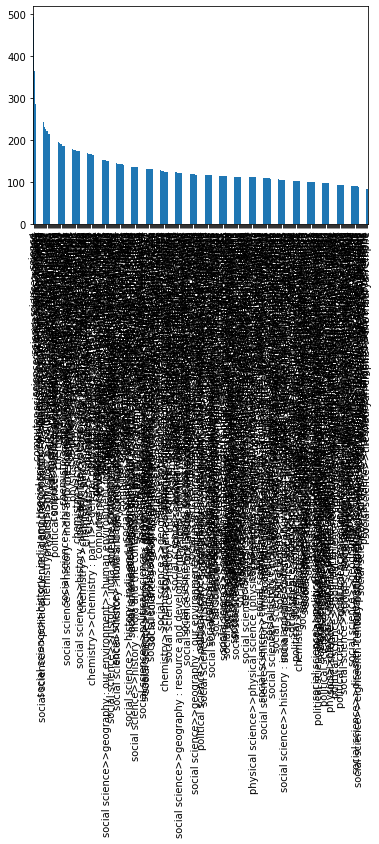

In [ ]:
data["board_syllabus"].value_counts().plot(kind='bar')